<a href="https://colab.research.google.com/github/jmnu4245/py-draw-simple-simplicial-coomplex/blob/main/k-simplex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def extract_simplices(simplices, k):

    # Crear un diccionario para almacenar los simplices por dimensión
    simplices_by_dim = {i: set() for i in range(k+1)}


    # Para cada simplex dado
    for simplex in simplices:
        # Para cada dimensión de simplices desde 0 hasta k
        for dim in range(k+1):
            simplices_by_dim[dim].update(tuple(sorted(comb)) for comb in itertools.combinations(simplex, dim + 1))

    # Convertir cada conjunto de simplices a lista
    for dim in range(k+1):
        simplices_by_dim[dim] = list(simplices_by_dim[dim])

    return simplices_by_dim

In [ ]:
import itertools
import matplotlib.pyplot as plt
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

def draw_k_simplex(simplices):

    fig = plt.figure()
    # Listar los vértices (0-simplices)
    nodes = [item for sublist in simplices[0] for item in sublist]
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(simplices[1])
    pos = nx.spring_layout(G)
    a=0
    for i in range(1,len(simplices),1):
        patches = []
        a=+0.2
        for face in simplices[i]:
            # Obtener las coordenadas de los nodos que forman la cara
            polygon = Polygon([pos[node] for node in face], closed=True)
            patches.append(polygon)

        # Crear una colección de parches para colorear las caras
        p = PatchCollection(patches, alpha=a, edgecolor="black", facecolor="orange")
        plt.gca().add_collection(p)
    nx.draw(G, with_labels=True, node_color="lightblue", font_weight="bold",pos=pos)
    plt.show()




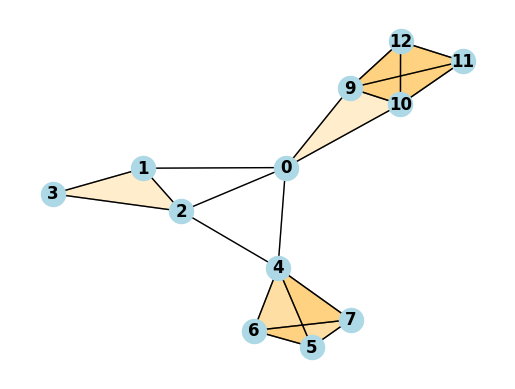

In [15]:
# Ejemplo de uso con un 4-simplex
simplices = [[0,1],[1,2,3],[2,4],[4,5,6,7],[4,0],[0,2],[0,9,10],[9,10,11,12]]
dict=extract_simplices(simplices,7)
draw_k_simplex(dict)